## Chapter 13: Artifitial Neural Networks

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

C:\Users\raj15\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

## Importing the dataset

In [3]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Data Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.25, random_state = 0)

# TensorFlow 2.0

In [7]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [9]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

## Creating a Model

## Model - as a list of layers

In [10]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


In [11]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

## Model - adding in layers one by one

In [12]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='Binary_crossentropy')

## Compiling Model

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

## Checking shape of input

In [13]:
X_train.shape

(227, 13)

## Creating Model

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential()

# 
model.add(Dense(units=13,activation='relu',input_shape=(13,)))

model.add(Dense(units=7,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 98        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 8         
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


## Training model

In [16]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 227 samples, validate on 76 samples
Epoch 1/400
227/227 [==============================] - 3s 14ms/sample - loss: 0.6224 - accuracy: 0.6432 - val_loss: 0.6150 - val_accuracy: 0.6842
Epoch 2/400
227/227 [==============================] - 0s 575us/sample - loss: 0.6104 - accuracy: 0.6696 - val_loss: 0.6063 - val_accuracy: 0.7237
Epoch 3/400
227/227 [==============================] - 0s 609us/sample - loss: 0.6006 - accuracy: 0.7004 - val_loss: 0.5978 - val_accuracy: 0.7237
Epoch 4/400
227/227 [==============================] - 0s 579us/sample - loss: 0.5926 - accuracy: 0.7269 - val_loss: 0.5899 - val_accuracy: 0.7368
Epoch 5/400
227/227 [==============================] - 0s 694us/sample - loss: 0.5846 - accuracy: 0.7225 - val_loss: 0.5830 - val_accuracy: 0.7763
Epoch 6/400
227/227 [==============================] - 0s 813us/sample - loss: 0.5772 - accuracy: 0.7357 - val_loss: 0.5770 - val_accuracy: 0.7895
Epoch 7/400
227/227 [==============================] - 0s 699us/sample - l

227/227 [==============================] - 0s 534us/sample - loss: 0.2618 - accuracy: 0.8811 - val_loss: 0.3671 - val_accuracy: 0.8289
Epoch 112/400
227/227 [==============================] - 0s 576us/sample - loss: 0.2616 - accuracy: 0.8855 - val_loss: 0.3669 - val_accuracy: 0.8289
Epoch 113/400
227/227 [==============================] - 0s 533us/sample - loss: 0.2606 - accuracy: 0.8855 - val_loss: 0.3687 - val_accuracy: 0.8289
Epoch 114/400
227/227 [==============================] - 0s 588us/sample - loss: 0.2595 - accuracy: 0.8811 - val_loss: 0.3696 - val_accuracy: 0.8289
Epoch 115/400
227/227 [==============================] - 0s 568us/sample - loss: 0.2592 - accuracy: 0.8811 - val_loss: 0.3701 - val_accuracy: 0.8421
Epoch 116/400
227/227 [==============================] - 0s 535us/sample - loss: 0.2581 - accuracy: 0.8811 - val_loss: 0.3718 - val_accuracy: 0.8421
Epoch 117/400
227/227 [==============================] - 0s 533us/sample - loss: 0.2577 - accuracy: 0.8855 - val_loss: 0

227/227 [==============================] - 0s 554us/sample - loss: 0.2216 - accuracy: 0.9075 - val_loss: 0.3889 - val_accuracy: 0.8289
Epoch 167/400
227/227 [==============================] - 0s 541us/sample - loss: 0.2213 - accuracy: 0.9075 - val_loss: 0.3874 - val_accuracy: 0.8289
Epoch 168/400
227/227 [==============================] - 0s 575us/sample - loss: 0.2199 - accuracy: 0.9031 - val_loss: 0.3877 - val_accuracy: 0.8289
Epoch 169/400
227/227 [==============================] - 0s 532us/sample - loss: 0.2197 - accuracy: 0.9119 - val_loss: 0.3871 - val_accuracy: 0.8289
Epoch 170/400
227/227 [==============================] - 0s 571us/sample - loss: 0.2190 - accuracy: 0.9119 - val_loss: 0.3879 - val_accuracy: 0.8289
Epoch 171/400
227/227 [==============================] - 0s 561us/sample - loss: 0.2182 - accuracy: 0.9119 - val_loss: 0.3871 - val_accuracy: 0.8289
Epoch 172/400
227/227 [==============================] - 0s 552us/sample - loss: 0.2176 - accuracy: 0.9163 - val_loss: 0

Epoch 221/400
227/227 [==============================] - 0s 532us/sample - loss: 0.1832 - accuracy: 0.9383 - val_loss: 0.4244 - val_accuracy: 0.8421
Epoch 222/400
227/227 [==============================] - 0s 584us/sample - loss: 0.1826 - accuracy: 0.9383 - val_loss: 0.4251 - val_accuracy: 0.8421
Epoch 223/400
227/227 [==============================] - 0s 527us/sample - loss: 0.1826 - accuracy: 0.9383 - val_loss: 0.4265 - val_accuracy: 0.8421
Epoch 224/400
227/227 [==============================] - 0s 536us/sample - loss: 0.1840 - accuracy: 0.9383 - val_loss: 0.4287 - val_accuracy: 0.8421
Epoch 225/400
227/227 [==============================] - 0s 545us/sample - loss: 0.1824 - accuracy: 0.9427 - val_loss: 0.4291 - val_accuracy: 0.8421
Epoch 226/400
227/227 [==============================] - 0s 536us/sample - loss: 0.1816 - accuracy: 0.9383 - val_loss: 0.4273 - val_accuracy: 0.8421
Epoch 227/400
227/227 [==============================] - 0s 518us/sample - loss: 0.1802 - accuracy: 0.9383

Epoch 276/400
227/227 [==============================] - 0s 602us/sample - loss: 0.1499 - accuracy: 0.9604 - val_loss: 0.4687 - val_accuracy: 0.8158
Epoch 277/400
227/227 [==============================] - 0s 540us/sample - loss: 0.1488 - accuracy: 0.9604 - val_loss: 0.4687 - val_accuracy: 0.8158
Epoch 278/400
227/227 [==============================] - 0s 554us/sample - loss: 0.1475 - accuracy: 0.9692 - val_loss: 0.4694 - val_accuracy: 0.8158
Epoch 279/400
227/227 [==============================] - 0s 550us/sample - loss: 0.1465 - accuracy: 0.9692 - val_loss: 0.4697 - val_accuracy: 0.8158
Epoch 280/400
227/227 [==============================] - 0s 545us/sample - loss: 0.1457 - accuracy: 0.9692 - val_loss: 0.4707 - val_accuracy: 0.8158
Epoch 281/400
227/227 [==============================] - 0s 549us/sample - loss: 0.1448 - accuracy: 0.9692 - val_loss: 0.4714 - val_accuracy: 0.8158
Epoch 282/400
227/227 [==============================] - 0s 552us/sample - loss: 0.1443 - accuracy: 0.9692

Epoch 331/400
227/227 [==============================] - 0s 554us/sample - loss: 0.1152 - accuracy: 0.9780 - val_loss: 0.5365 - val_accuracy: 0.7895
Epoch 332/400
227/227 [==============================] - 0s 598us/sample - loss: 0.1143 - accuracy: 0.9780 - val_loss: 0.5390 - val_accuracy: 0.7763
Epoch 333/400
227/227 [==============================] - 0s 536us/sample - loss: 0.1143 - accuracy: 0.9780 - val_loss: 0.5545 - val_accuracy: 0.7632
Epoch 334/400
227/227 [==============================] - 0s 536us/sample - loss: 0.1148 - accuracy: 0.9780 - val_loss: 0.5624 - val_accuracy: 0.7632
Epoch 335/400
227/227 [==============================] - 0s 523us/sample - loss: 0.1140 - accuracy: 0.9780 - val_loss: 0.5628 - val_accuracy: 0.7632
Epoch 336/400
227/227 [==============================] - 0s 530us/sample - loss: 0.1127 - accuracy: 0.9780 - val_loss: 0.5621 - val_accuracy: 0.7632
Epoch 337/400
227/227 [==============================] - 0s 580us/sample - loss: 0.1116 - accuracy: 0.9780

Epoch 386/400
227/227 [==============================] - 0s 562us/sample - loss: 0.0881 - accuracy: 0.9824 - val_loss: 0.6277 - val_accuracy: 0.7632
Epoch 387/400
227/227 [==============================] - 0s 580us/sample - loss: 0.0881 - accuracy: 0.9824 - val_loss: 0.6297 - val_accuracy: 0.7632
Epoch 388/400
227/227 [==============================] - 0s 590us/sample - loss: 0.0876 - accuracy: 0.9824 - val_loss: 0.6304 - val_accuracy: 0.7632
Epoch 389/400
227/227 [==============================] - 0s 567us/sample - loss: 0.0868 - accuracy: 0.9780 - val_loss: 0.6312 - val_accuracy: 0.7632
Epoch 390/400
227/227 [==============================] - 0s 602us/sample - loss: 0.0861 - accuracy: 0.9780 - val_loss: 0.6312 - val_accuracy: 0.7632
Epoch 391/400
227/227 [==============================] - 0s 637us/sample - loss: 0.0853 - accuracy: 0.9824 - val_loss: 0.6323 - val_accuracy: 0.7632
Epoch 392/400
227/227 [==============================] - 0s 615us/sample - loss: 0.0847 - accuracy: 0.9824

## Overfitting

Text(0.5, 0, 'Epoch')

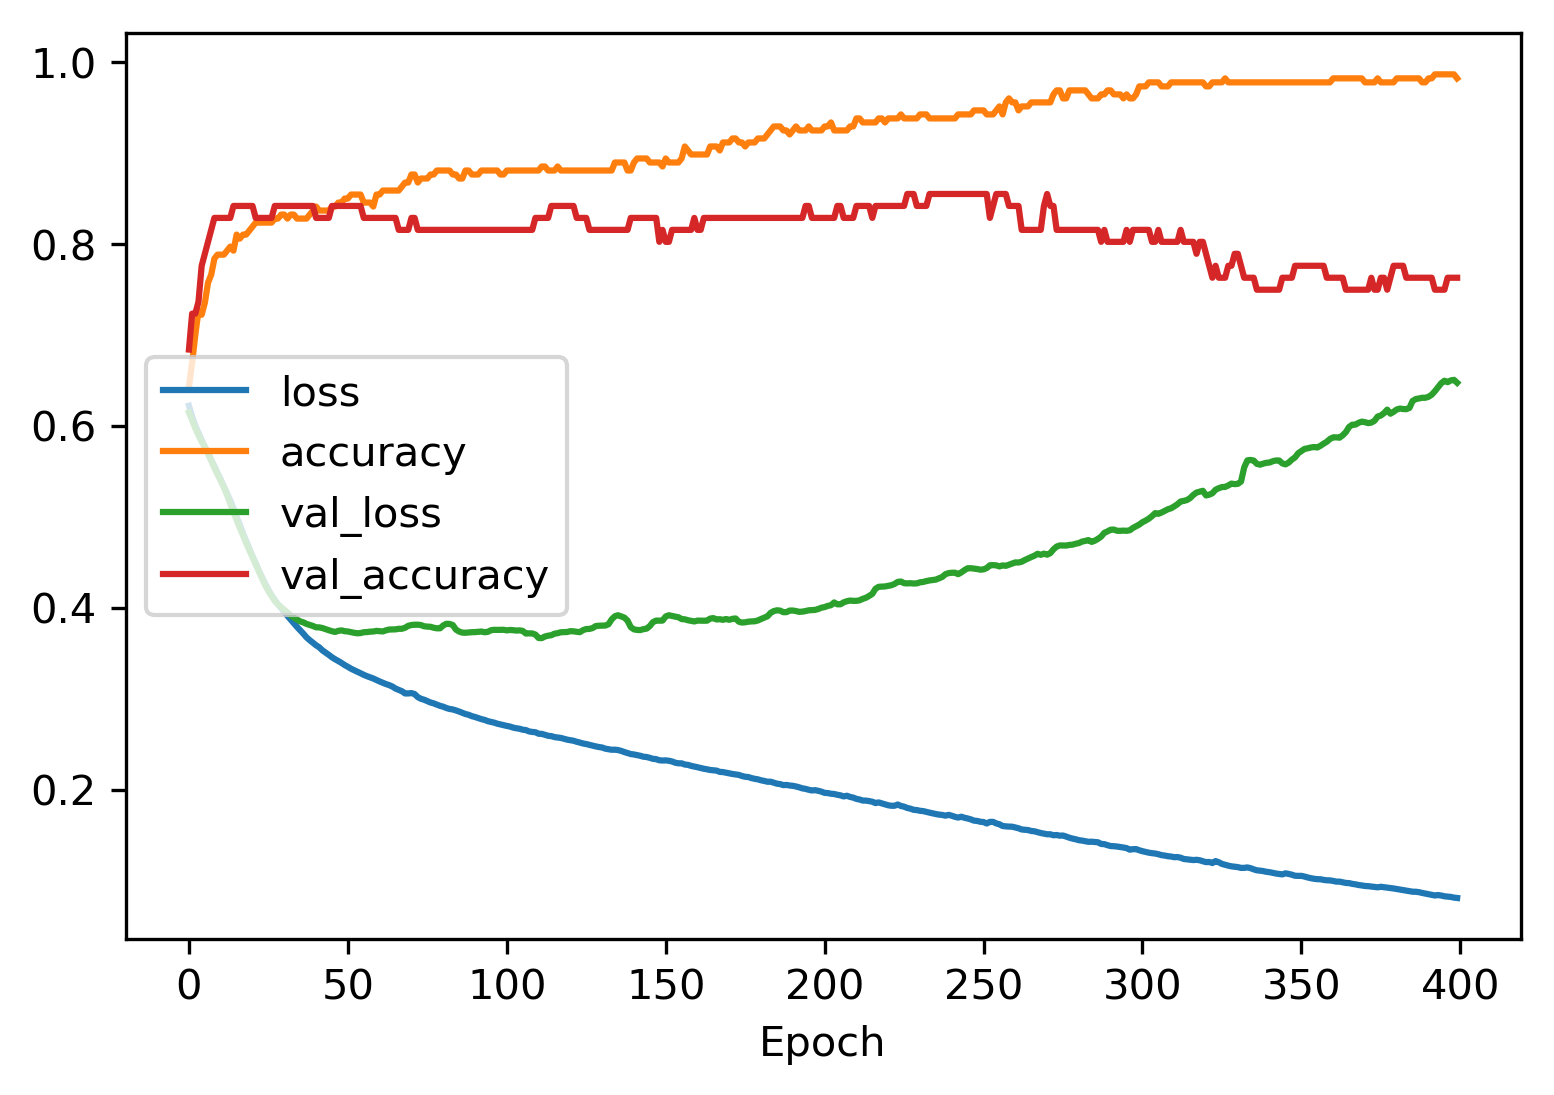

In [17]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_xlabel('Epoch')

## Dropout and early stopping

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
model = Sequential()

# 
model.add(Dense(units=13,activation='relu',input_shape=(13,)))
model.add(Dropout(0.5))
model.add(Dense(units=7,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 13)                182       
_________________________________________________________________
dropout (Dropout)            (None, 13)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 98        
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [20]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 227 samples, validate on 76 samples
Epoch 1/400
227/227 [==============================] - 3s 11ms/sample - loss: 0.9337 - accuracy: 0.4758 - val_loss: 0.7425 - val_accuracy: 0.4211
Epoch 2/400
227/227 [==============================] - 0s 719us/sample - loss: 0.7732 - accuracy: 0.5110 - val_loss: 0.7314 - val_accuracy: 0.4079
Epoch 3/400
227/227 [==============================] - 0s 645us/sample - loss: 0.8072 - accuracy: 0.5419 - val_loss: 0.7213 - val_accuracy: 0.4079
Epoch 4/400
227/227 [==============================] - 0s 611us/sample - loss: 0.8361 - accuracy: 0.4626 - val_loss: 0.7103 - val_accuracy: 0.4342
Epoch 5/400
227/227 [==============================] - 0s 628us/sample - loss: 0.9115 - accuracy: 0.5110 - val_loss: 0.6996 - val_accuracy: 0.4605
Epoch 6/400
227/227 [==============================] - 0s 677us/sample - loss: 0.7935 - accuracy: 0.5198 - val_loss: 0.6888 - val_accuracy: 0.4737
Epoch 7/400
227/227 [==============================] - 0s 694us/sample - l

Epoch 56/400
227/227 [==============================] - 0s 625us/sample - loss: 0.5977 - accuracy: 0.7181 - val_loss: 0.5069 - val_accuracy: 0.8289
Epoch 57/400
227/227 [==============================] - 0s 618us/sample - loss: 0.5703 - accuracy: 0.6608 - val_loss: 0.5046 - val_accuracy: 0.8289
Epoch 58/400
227/227 [==============================] - 0s 694us/sample - loss: 0.5530 - accuracy: 0.6916 - val_loss: 0.5021 - val_accuracy: 0.8289
Epoch 59/400
227/227 [==============================] - 0s 650us/sample - loss: 0.5739 - accuracy: 0.7137 - val_loss: 0.4993 - val_accuracy: 0.8289
Epoch 60/400
227/227 [==============================] - 0s 602us/sample - loss: 0.5410 - accuracy: 0.7357 - val_loss: 0.4957 - val_accuracy: 0.8289
Epoch 61/400
227/227 [==============================] - 0s 677us/sample - loss: 0.5809 - accuracy: 0.6872 - val_loss: 0.4929 - val_accuracy: 0.8289
Epoch 62/400
227/227 [==============================] - 0s 626us/sample - loss: 0.5540 - accuracy: 0.6872 - val_

Text(0.5, 0, 'Epoch')

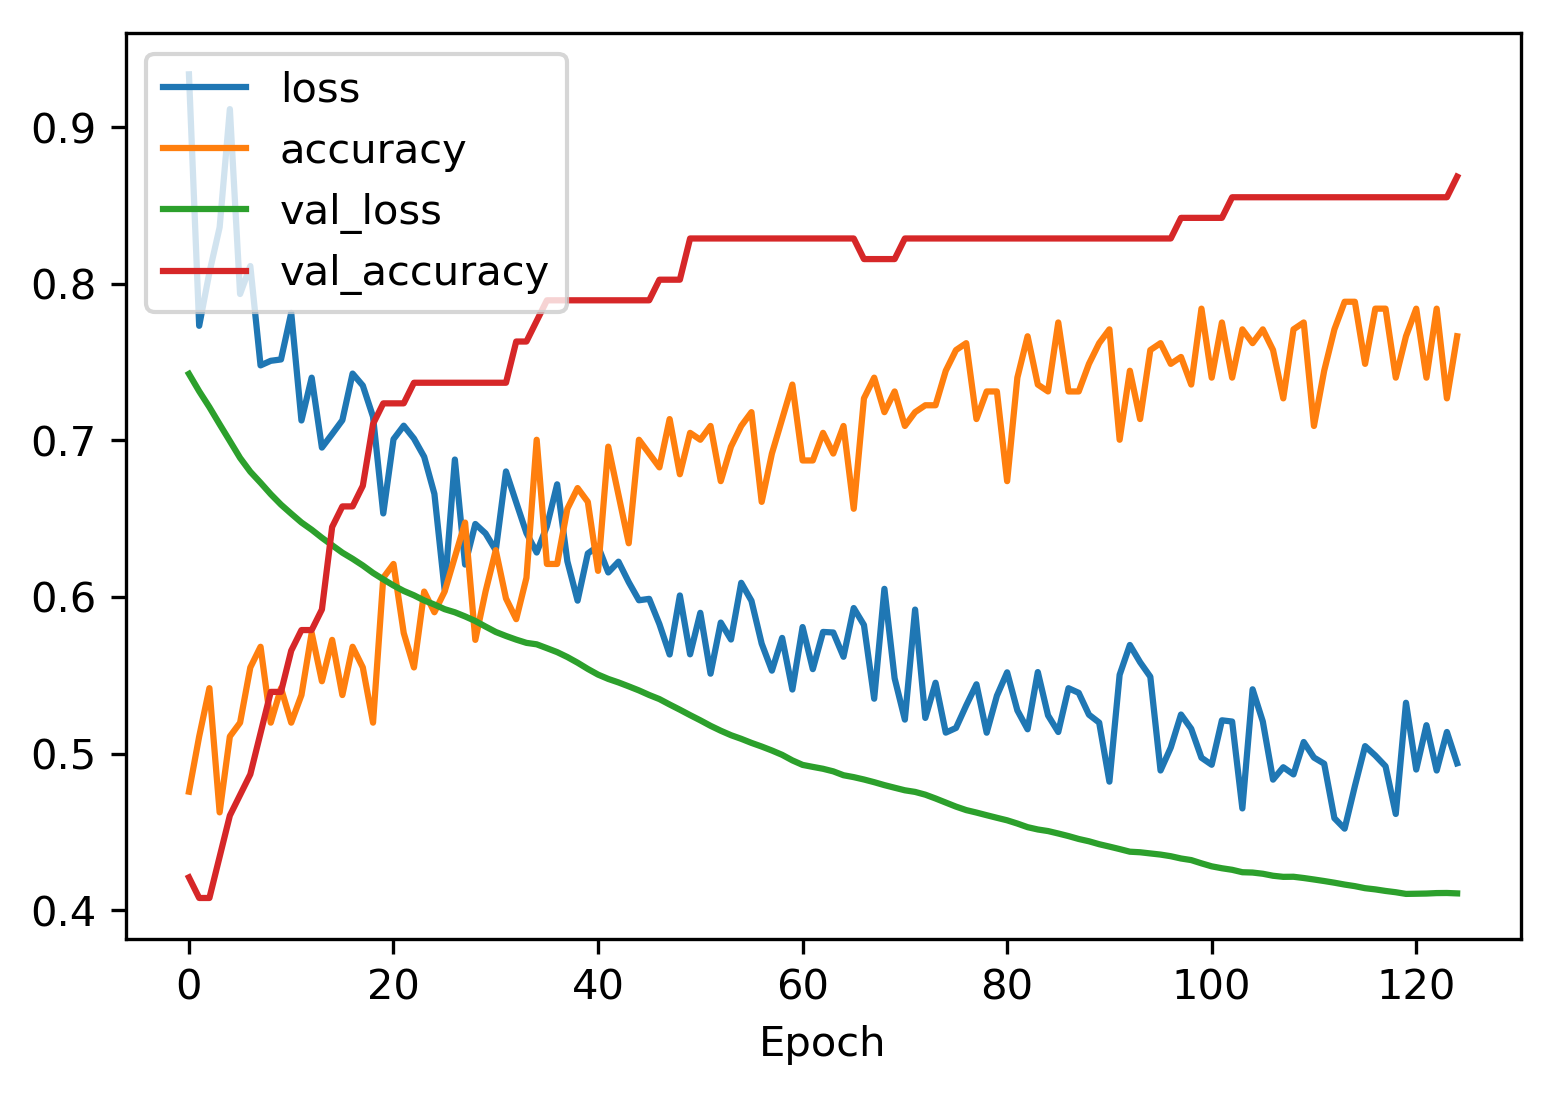

In [21]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_xlabel('Epoch')

# Model Evaluation

In [22]:
predictions = model.predict_classes(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[26  7]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



## Predicting new instance

In [24]:
new_data=dataset.iloc[2,:-1].values
model.predict(sc.transform([new_data]))

array([[0.8852281]], dtype=float32)

## Case study

In [25]:
dataset = pd.read_csv('Breast_Cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
dataset.drop(['id','Unnamed: 32'],axis=1,inplace=True)

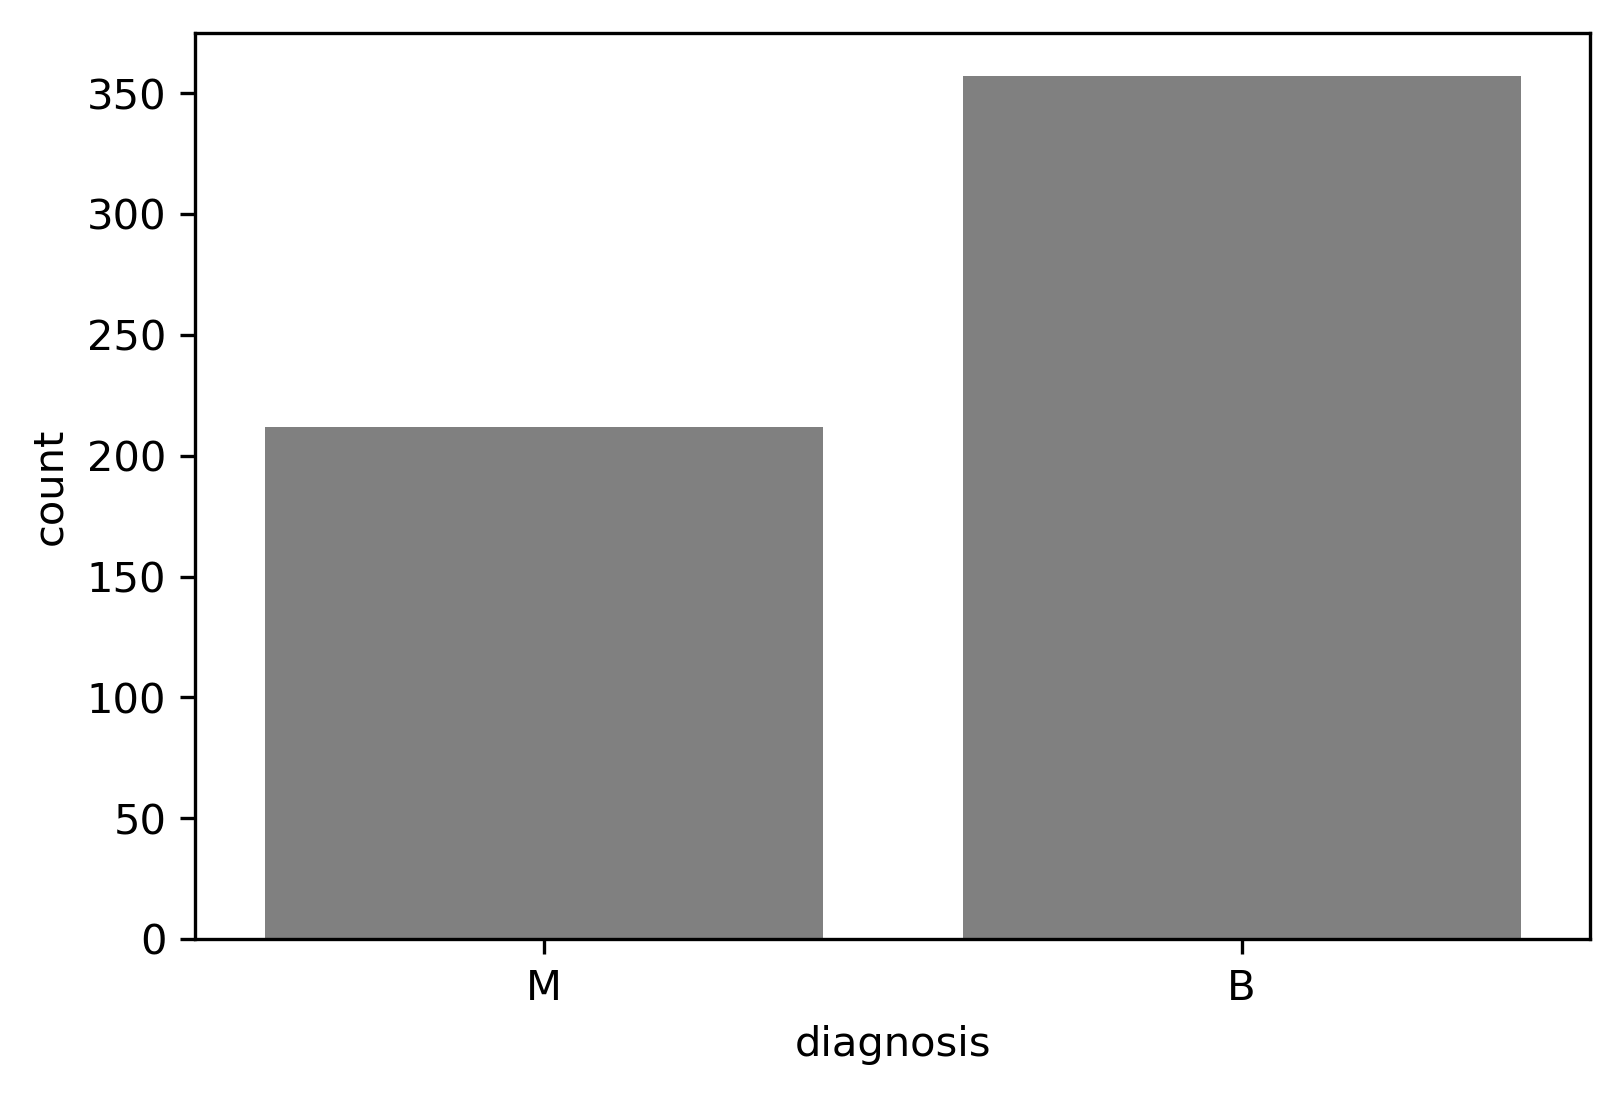

In [27]:
sns.countplot(x='diagnosis',data=dataset,color='gray')

In [28]:
dataset['diagnosis'] = dataset['diagnosis'].map({'B':0,'M':1})

In [29]:

dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

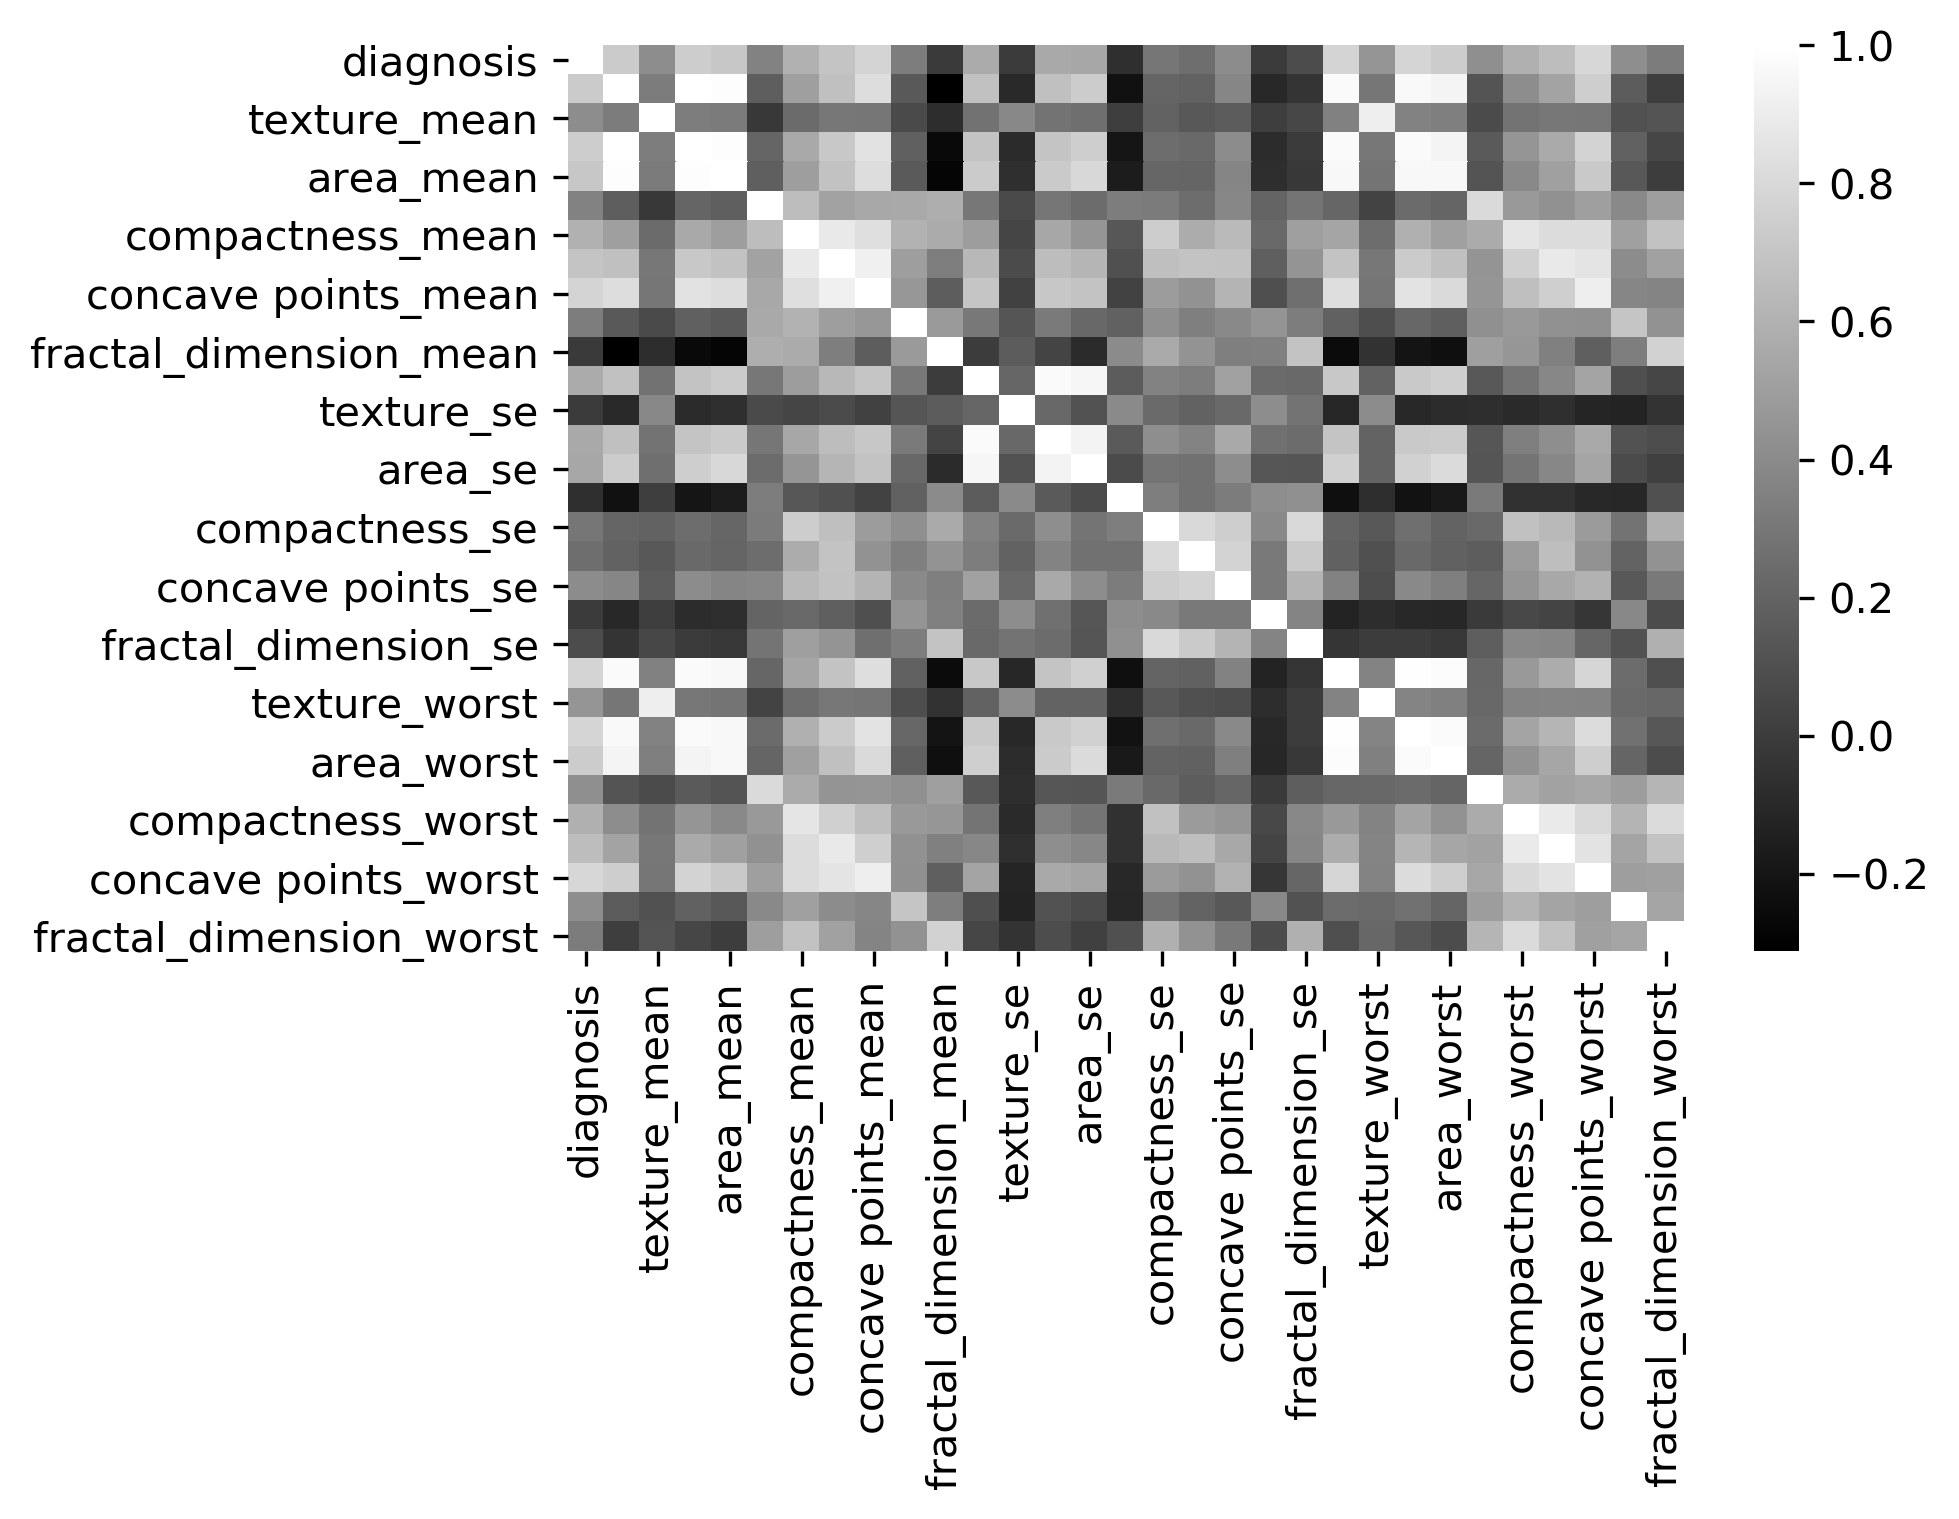

In [30]:
sns.heatmap(dataset.corr(),cmap='gray')

In [31]:
X = dataset.iloc[:,1:].values
y =dataset.iloc[:,0].values

## Data Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [34]:
X_train.shape

(455, 30)

In [35]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

## Creating the Model

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
model = Sequential()

# 
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])


In [37]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          batch_size= 64,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 455 samples, validate on 114 samples
Epoch 1/400
455/455 [==============================] - 2s 5ms/sample - loss: 180.1601 - accuracy: 0.5297 - val_loss: 38.6814 - val_accuracy: 0.6316
Epoch 2/400
455/455 [==============================] - 0s 329us/sample - loss: 149.0649 - accuracy: 0.4945 - val_loss: 26.4790 - val_accuracy: 0.6316
Epoch 3/400
455/455 [==============================] - 0s 324us/sample - loss: 120.8854 - accuracy: 0.5363 - val_loss: 15.1530 - val_accuracy: 0.6316
Epoch 4/400
455/455 [==============================] - 0s 328us/sample - loss: 123.1790 - accuracy: 0.4725 - val_loss: 5.5793 - val_accuracy: 0.6404
Epoch 5/400
455/455 [==============================] - 0s 362us/sample - loss: 102.6708 - accuracy: 0.5253 - val_loss: 1.3529 - val_accuracy: 0.5088
Epoch 6/400
455/455 [==============================] - 0s 319us/sample - loss: 93.4347 - accuracy: 0.5231 - val_loss: 5.0951 - val_accuracy: 0.3860
Epoch 7/400
455/455 [==============================] - 0s 30

Epoch 56/400
455/455 [==============================] - 0s 362us/sample - loss: 0.7519 - accuracy: 0.7692 - val_loss: 0.4793 - val_accuracy: 0.9211
Epoch 57/400
455/455 [==============================] - 0s 299us/sample - loss: 0.6892 - accuracy: 0.7582 - val_loss: 0.4750 - val_accuracy: 0.9035
Epoch 58/400
455/455 [==============================] - 0s 298us/sample - loss: 0.9380 - accuracy: 0.7516 - val_loss: 0.4635 - val_accuracy: 0.9211
Epoch 59/400
455/455 [==============================] - 0s 329us/sample - loss: 0.7499 - accuracy: 0.7604 - val_loss: 0.4556 - val_accuracy: 0.9211
Epoch 60/400
455/455 [==============================] - 0s 283us/sample - loss: 0.5344 - accuracy: 0.8000 - val_loss: 0.4531 - val_accuracy: 0.9211
Epoch 61/400
455/455 [==============================] - 0s 320us/sample - loss: 0.6392 - accuracy: 0.7780 - val_loss: 0.4568 - val_accuracy: 0.9211
Epoch 62/400
455/455 [==============================] - 0s 320us/sample - loss: 0.6005 - accuracy: 0.7560 - val_

Epoch 111/400
455/455 [==============================] - 0s 289us/sample - loss: 0.3679 - accuracy: 0.8813 - val_loss: 0.2644 - val_accuracy: 0.9298
Epoch 112/400
455/455 [==============================] - 0s 280us/sample - loss: 0.3499 - accuracy: 0.8747 - val_loss: 0.2529 - val_accuracy: 0.9298
Epoch 113/400
455/455 [==============================] - 0s 287us/sample - loss: 0.3221 - accuracy: 0.8967 - val_loss: 0.2609 - val_accuracy: 0.9298
Epoch 114/400
455/455 [==============================] - 0s 270us/sample - loss: 0.3394 - accuracy: 0.8967 - val_loss: 0.2601 - val_accuracy: 0.9211
Epoch 115/400
455/455 [==============================] - 0s 279us/sample - loss: 0.3021 - accuracy: 0.9033 - val_loss: 0.2600 - val_accuracy: 0.9298
Epoch 116/400
455/455 [==============================] - 0s 283us/sample - loss: 0.3191 - accuracy: 0.9033 - val_loss: 0.2691 - val_accuracy: 0.9211
Epoch 117/400
455/455 [==============================] - 0s 269us/sample - loss: 0.3221 - accuracy: 0.8923

Epoch 166/400
455/455 [==============================] - 0s 300us/sample - loss: 0.2692 - accuracy: 0.8967 - val_loss: 0.2120 - val_accuracy: 0.9298
Epoch 167/400
455/455 [==============================] - 0s 324us/sample - loss: 0.2745 - accuracy: 0.8945 - val_loss: 0.2015 - val_accuracy: 0.9298
Epoch 168/400
455/455 [==============================] - 0s 333us/sample - loss: 0.2730 - accuracy: 0.8967 - val_loss: 0.2035 - val_accuracy: 0.9298
Epoch 169/400
455/455 [==============================] - 0s 311us/sample - loss: 0.3052 - accuracy: 0.8989 - val_loss: 0.2105 - val_accuracy: 0.9386
Epoch 170/400
455/455 [==============================] - 0s 296us/sample - loss: 0.2811 - accuracy: 0.9033 - val_loss: 0.2160 - val_accuracy: 0.9298
Epoch 171/400
455/455 [==============================] - 0s 292us/sample - loss: 0.2589 - accuracy: 0.9077 - val_loss: 0.2150 - val_accuracy: 0.9211
Epoch 172/400
455/455 [==============================] - 0s 287us/sample - loss: 0.2857 - accuracy: 0.9033

Epoch 221/400
455/455 [==============================] - 0s 366us/sample - loss: 0.2356 - accuracy: 0.9165 - val_loss: 0.1951 - val_accuracy: 0.9298
Epoch 222/400
455/455 [==============================] - 0s 373us/sample - loss: 0.2319 - accuracy: 0.9143 - val_loss: 0.2013 - val_accuracy: 0.9298
Epoch 223/400
455/455 [==============================] - 0s 311us/sample - loss: 0.2731 - accuracy: 0.9033 - val_loss: 0.2864 - val_accuracy: 0.8596
Epoch 224/400
455/455 [==============================] - 0s 285us/sample - loss: 0.2994 - accuracy: 0.8901 - val_loss: 0.2191 - val_accuracy: 0.9123
Epoch 225/400
455/455 [==============================] - 0s 292us/sample - loss: 0.2187 - accuracy: 0.9055 - val_loss: 0.1985 - val_accuracy: 0.9298
Epoch 226/400
455/455 [==============================] - 0s 320us/sample - loss: 0.2601 - accuracy: 0.9099 - val_loss: 0.1829 - val_accuracy: 0.9298
Epoch 227/400
455/455 [==============================] - 0s 305us/sample - loss: 0.2578 - accuracy: 0.9077

Text(0.5, 0, 'Epoch')

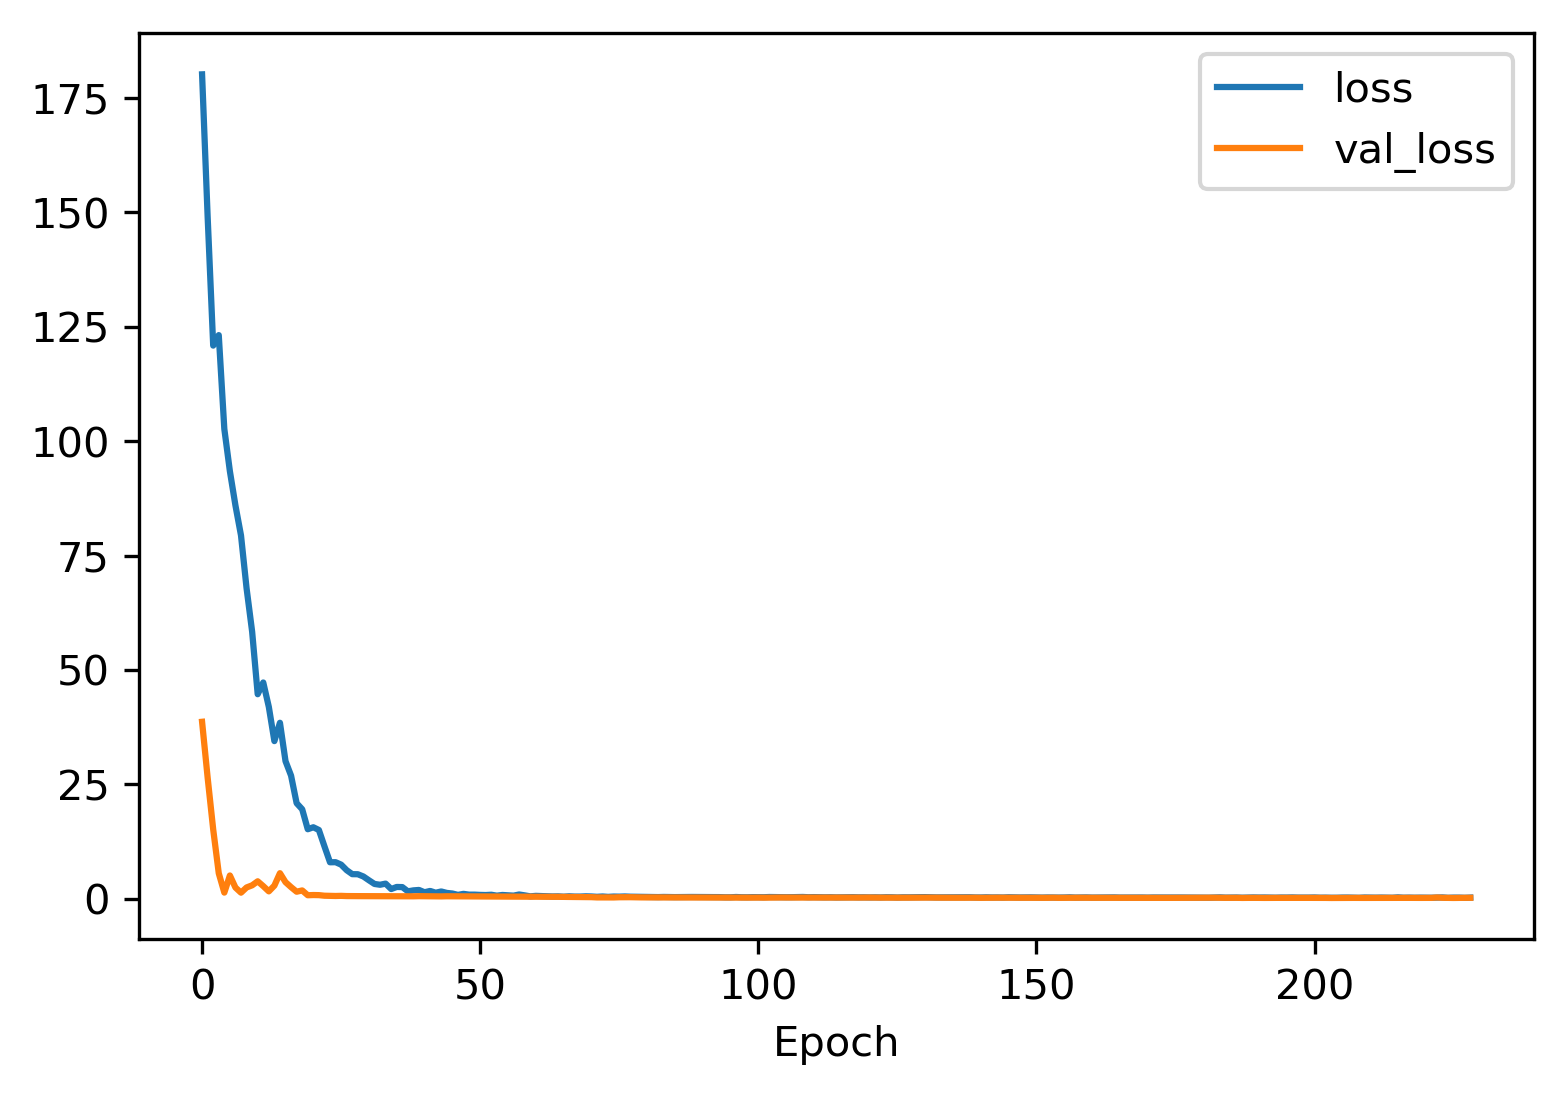

In [38]:
model_loss = pd.DataFrame(model.history.history)
ax = model_loss[['loss','val_loss']].plot()
ax.set_xlabel('Epoch')

# Model Evaluation

In [39]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[66  6]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        72
           1       0.86      0.90      0.88        42

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

